In [46]:
import zipfile
import os

import pandas as pd
import matplotlib.pyplot as plt

# Set display options to display all columns
pd.set_option('display.max_columns', None)
# Set display option to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

In [2]:
# File path to the data (zip file) and the extraction directory
zip_file_path = '../data/predicting-red-hat-business-value.zip'
extraction_dir = '../data/raw'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

In [3]:
# List all files in the extraction directory
for file_name in os.listdir(extraction_dir):
    if file_name.endswith('.zip'):
        file_path = os.path.join(extraction_dir, file_name)
        
        # Extract each zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_dir)
        
        print(f"{file_name} extracted successfully!")
        os.remove(file_path)

people.csv.zip extracted successfully!
act_train.csv.zip extracted successfully!
sample_submission.csv.zip extracted successfully!
act_test.csv.zip extracted successfully!


### Load and inspect data

In [4]:
# Define the file path
people_file_path = '../data/raw/people.csv'
train_file_path = '../data/raw/act_train.csv'
test_file_path = '../data/raw/act_test.csv'

# Load the datasets into DataFrame
people_df = pd.read_csv(people_file_path)
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [5]:
# Display the shape and first five rows of the people dataframe
print(people_df.shape)
people_df.head()

(189118, 41)


,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [6]:
# Display the shape and first five rows of the train dataframe
print(train_df.shape)
train_df.head()

(2197291, 15)


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [7]:
# Display the shape and first five rows of the test dataframe
print(test_df.shape)
test_df.head()

(498687, 14)


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


### Check the dataframe info

In [8]:
print("People Data Info:")
print(people_df.info(), "\n")

print("Training Activity Data Info:")
print(train_df.info(), "\n")

print("Test Activity Data Info:")
print(test_df.info())

People Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   people_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null

### Check for missing values

In [9]:
print("Missing values in the people data:")
people_df.isnull().sum()

Missing values in the people data:


people_id    0
char_1       0
group_1      0
char_2       0
date         0
char_3       0
char_4       0
char_5       0
char_6       0
char_7       0
char_8       0
char_9       0
char_10      0
char_11      0
char_12      0
char_13      0
char_14      0
char_15      0
char_16      0
char_17      0
char_18      0
char_19      0
char_20      0
char_21      0
char_22      0
char_23      0
char_24      0
char_25      0
char_26      0
char_27      0
char_28      0
char_29      0
char_30      0
char_31      0
char_32      0
char_33      0
char_34      0
char_35      0
char_36      0
char_37      0
char_38      0
dtype: int64

In [10]:
print("Missing values in the train data")
train_df.isnull().sum()/len(train_df) * 100

Missing values in the train data


people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               92.826849
char_2               92.826849
char_3               92.826849
char_4               92.826849
char_5               92.826849
char_6               92.826849
char_7               92.826849
char_8               92.826849
char_9               92.826849
char_10               7.173151
outcome               0.000000
dtype: float64

In [11]:
print("Missing values in the test data")
test_df.isnull().sum()/len(test_df) * 100

Missing values in the test data


people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               91.960488
char_2               91.960488
char_3               91.960488
char_4               91.960488
char_5               91.960488
char_6               91.960488
char_7               91.960488
char_8               91.960488
char_9               91.960488
char_10               8.039512
dtype: float64

**Missing values summary**

**People Data**
- All columns are complete, with no missing data.

**Traning Data**
- **High missing values:**
    - Columns `char_1` to `char_9`: Approximately 92.8% missing values.
    - Columns `char_2`: Approximately 7.2% missing values.
- **Complete Data:**
    - `people_id`, `activity_id`, `date`, `activity_category`, and `outcome` have no missing values.

**Test Data**
- **High missing values:**
    - Columns `char_1` to `char_9`: Approximately 92.0% missing values.
    - Columns `char_10`: Approximately 8.0% missing values.
- **Complete Data:**
    - people_id, activity_id, date, and activity_category have no missing values.

In [12]:
# Drop columns with more than 30% missing data
train_df.drop(columns=['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9'], inplace=True)
test_df.drop(columns=['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9'], inplace=True)

In [13]:
train_df.rename(columns={
    'date': 'activity_date',
    'char_10': 'activity_type'
}, inplace=True)

In [14]:
test_df.rename(columns={
    'date': 'activity_date',
    'char_10': 'activity_type'
}, inplace=True)

In [15]:
# Merge train with people data
train_merged = pd.merge(train_df, people_df, on='people_id', how='left')
train_merged.head()

,people_id,activity_id,activity_date,activity_category,activity_type,outcome,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


In [16]:
# Merge test with people data
test_merged = pd.merge(test_df, people_df, on='people_id', how='left')
test_merged.head()

,people_id,activity_id,activity_date,activity_category,activity_type,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100004,act1_249281,2022-07-20,type 1,NaN,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
1,ppl_100004,act2_230855,2022-07-20,type 5,type 682,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
2,ppl_10001,act1_240724,2022-10-14,type 1,NaN,type 2,group 25417,type 3,2022-10-14,type 6,type 6,type 4,type 1,type 1,type 2,type 2,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,90
3,ppl_10001,act1_83552,2022-11-27,type 1,NaN,type 2,group 25417,type 3,2022-10-14,type 6,type 6,type 4,type 1,type 1,type 2,type 2,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,90
4,ppl_10001,act2_1043301,2022-10-15,type 5,type 3015,type 2,group 25417,type 3,2022-10-14,type 6,type 6,type 4,type 1,type 1,type 2,type 2,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,90


In [17]:
print(train_merged.shape[0])
print(test_merged.shape[0])

2197291
498687


In [19]:
train_merged[['activity_date', 'date']].head(20)

,activity_date,date
0,2023-08-26,2021-06-29
1,2022-09-27,2021-06-29
2,2022-09-27,2021-06-29
3,2023-08-04,2021-06-29
4,2023-08-26,2021-06-29
5,2023-08-04,2021-06-29
6,2022-11-23,2021-01-06
7,2022-11-23,2021-01-06
8,2023-02-07,2022-06-10
9,2023-06-28,2022-06-10


In [25]:
truth = []
for item in train_merged.columns.to_list():
    if item in test_merged.columns.to_list():
        truth.append(True)
    else:
        truth.append(False)

all(truth)

False

In [29]:
# Check for duplicate columns
print("Columns in merged train data:", train_merged.columns)
print("Columns in merged test data:", test_merged.columns)

# Check for missing values
print("Missing values in merged train data:")
print(train_merged.isnull().sum())

print("\nMissing values in merged test data:")
print(test_merged.isnull().sum())

Columns in merged train data: Index(['people_id', 'activity_id', 'activity_date', 'activity_category',
       'activity_type', 'outcome', 'char_1', 'group_1', 'char_2', 'date',
       'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9',
       'char_10', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38'],
      dtype='object')
Columns in merged test data: Index(['people_id', 'activity_id', 'activity_date', 'activity_category',
       'activity_type', 'char_1', 'group_1', 'char_2', 'date', 'char_3',
       'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10',
       'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16',
       'char_17', 'char_18', 'char_19', 'ch

## Basic statistics on the merged datasets

In [34]:
# Basic statistics for numerical columns in the training set
train_merged_stats = train_merged.describe()
train_merged_stats

,outcome,char_38
count,2197291.0000,2197291.0000
mean,0.4440,49.9805
std,0.4968,36.0856
min,0.0000,0.0000
25%,0.0000,0.0000
50%,0.0000,59.0000
75%,1.0000,82.0000
max,1.0000,100.0000


In [38]:
# Check categorical statistics
train_merged_categorical_stats = {
    col: train_merged[col].value_counts().head() for col in train_merged.select_dtypes(include=['object']).columns
}

train_merged_categorical_stats

{'people_id': people_id
 ppl_294918    55103
 ppl_370270    53668
 ppl_105739    45936
 ppl_54699     23969
 ppl_64887      7052
 Name: count, dtype: int64,
 'activity_id': activity_id
 act2_1734928    1
 act1_309257     1
 act1_74304      1
 act1_69639      1
 act1_417972     1
 Name: count, dtype: int64,
 'activity_date': activity_date
 2022-09-30    48174
 2022-09-16    43322
 2022-10-23    40821
 2022-09-15    30019
 2022-10-22    29685
 Name: count, dtype: int64,
 'activity_category': activity_category
 type 2    904683
 type 5    490710
 type 3    429408
 type 4    207465
 type 1    157615
 Name: count, dtype: int64,
 'activity_type': activity_type
 type 1      904683
 type 23     200408
 type 2      116191
 type 61      35417
 type 452     23513
 Name: count, dtype: int64,
 'char_1': char_1
 type 2    1991452
 type 1     205839
 Name: count, dtype: int64,
 'group_1': group_1
 group 17304    799125
 group 27940     53668
 group 667       15865
 group 8386       7929
 group 20472 

In [44]:
# Check the outcome distribution
outcome_distribution = train_merged['outcome'].value_counts(normalize=True)
outcome_distribution

outcome
0   0.5560
1   0.4440
Name: proportion, dtype: float64

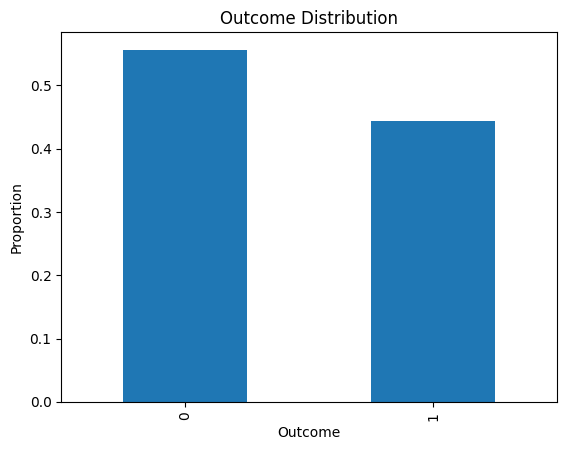

In [48]:
outcome_distribution.plot.bar()
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.show()

In [50]:
# Save merged training and testing data
train_merged.to_csv('../data/interim/merged_train.csv.zip', index=False, compression='zip')
test_merged.to_csv('../data/interim/merged_test.csv.zip', index=False, compression='zip')

## Conclusion

1. **Initial Data Overview:**
    - The datasets: `people`, `train`, and `test` was explored.
    - The `people` dataset contains 189118 entries with 41 columns.
    - The `train` dataset has 2,197,291 entries with 15 columns.
    - The `test` dataset includes 498,687 entries with 14 columns.

2. **Missing Values Analysis:**
    - Columns with missing values was identified in the `train` and `test` datasets.
    - Columns with more than 30% missing values were identified and dropped.
    - After dropping the columns, the datasets were merged on the `people_id` column.

3. **Data Merging:**
    - The `people` data was successfully merged with both `train` and `test` datasets on the `people_id` column, resulting in comprehensive datasets for further analysis.

4. **Outcom Distribution Analysis:**
    - The `outcom` column in the `train` dataset was examined, revealing a distribution of approximately:
        - 0 : 55.60%
        - 1: 44.40%

**Next** is data cleaning and preprocessing.